In [1]:
#importing libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

## Dataset

In [2]:
#reading the dataset
df = pd.read_csv('Aspect_Acommodation.csv')
df

,Row_Number,Gender,Location,Time,Race,Time_Spent_Homeless,Method_Found,Eligible,Preffered_Acommodation,Accepted_Acommodation
0,1,Female,Stechford,10AM,Other,Less than a month,Friend,1,1,1
1,2,Male,Other,12PM,Indian,7-12 months,Referral,0,0,0
2,3,Female,Perry Barr,10AM,White,Less than a month,Referral,1,0,0
3,4,Male,Other,2PM,White,7-12 months,Themselves,0,1,0
4,5,Male,Kings Norton,4PM,Pakistani,4-6 Months,Referral,1,1,1
...,...,...,...,...,...,...,...,...,...,...
359,360,Male,Stechford,2PM,Bangladeshi,Less than a month,Phone,1,1,1
360,361,Male,Bordesley Green,10AM,Pakistani,4-6 Months,Phone,0,0,0
361,362,Female,Balsall Heath,2PM,Black,1-3 Months,Referral,1,1,1
362,363,Female,Sparkbrook,2PM,White,1-3 Months,Phone,1,1,1


# Data Analysis

In [3]:
print(df.Gender.value_counts())

Male      218
Female    146
Name: Gender, dtype: int64


In [4]:
print(df.Location.value_counts())

Balsall Heath       41
Sparkbrook          37
Small Heath         31
Sparkhill           29
Erdington           28
Acocks Green        24
Tyseley             23
Stechford           23
Other               22
Kings Norton        20
Bordesley Green     18
Yardley             17
Perry Barr          17
Digbeth             11
Aston                9
Mosely               8
Sutton Coldfield     6
Name: Location, dtype: int64


In [5]:
weatherYes = df.loc[df['Accepted_Acommodation']== 1, :]['Location'].value_counts()
weatherYes

Balsall Heath       28
Sparkbrook          22
Small Heath         18
Sparkhill           18
Erdington           18
Other               15
Kings Norton        14
Stechford           13
Yardley             13
Acocks Green        11
Bordesley Green     11
Tyseley             10
Perry Barr          10
Digbeth              9
Mosely               6
Sutton Coldfield     4
Aston                3
Name: Location, dtype: int64

In [6]:
print(df.Race.value_counts())

White          93
European       66
Pakistani      59
Indian         41
Bangladeshi    38
Black          37
Other          30
Name: Race, dtype: int64


In [7]:
print(df.Time.value_counts())

2PM     105
10AM     99
12PM     81
4PM      79
Name: Time, dtype: int64


In [8]:
print(df.Time_Spent_Homeless.value_counts())

Less than a month    139
1-3 Months            86
4-6 Months            73
7-12 months           42
More than 1 year      24
Name: Time_Spent_Homeless, dtype: int64


In [9]:
print(df.Method_Found.value_counts())

Referral      101
Friend         79
Phone          70
Online         52
Themselves     33
Other          29
Name: Method_Found, dtype: int64


In [10]:
print(df.Eligible.value_counts())

1    300
0     64
Name: Eligible, dtype: int64


In [11]:
print(df.Preffered_Acommodation.value_counts())

0    183
1    181
Name: Preffered_Acommodation, dtype: int64


In [12]:
print(df.Accepted_Acommodation.value_counts())

1    223
0    141
Name: Accepted_Acommodation, dtype: int64


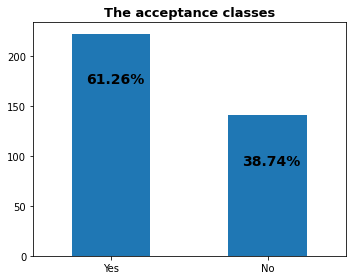

In [13]:
#producing a bar chart 

fig, ax = plt.subplots(figsize=(5,4))
name = ["Yes", "No"]
ax = df.Accepted_Acommodation.value_counts().plot(kind='bar')
ax.set_title("The acceptance classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
    
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x1c8ea639d00>,
 [Text(-0.2691176145693501, 1.1694339269614606, 'Less than a month'),
  Text(-0.9648649011026272, -0.5282383199089381, '1-3 Months'),
  Text(0.3656858323109632, -1.0374362014345935, '4-6 Months'),
  Text(1.0773037011953603, -0.22229875256235257, '7-12 months'),
  Text(0.9996501702763285, 0.45902019243875064, 'More than 1 year')],
 [Text(-0.1569852751654542, 0.6821697907275186, '35.0%'),
  Text(-0.5262899460559785, -0.28812999267760253, '23.8%'),
  Text(0.19946499944234353, -0.5658742916915964, '21.1%'),
  Text(0.5876202006520146, -0.12125386503401048, '11.7%'),
  Text(0.5452637292416337, 0.25037465042113666, '8.5%')])

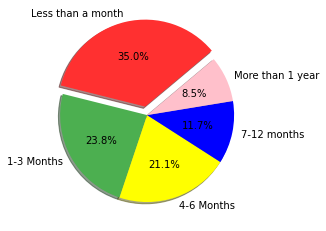

In [14]:
#creating pie chart for weather for when they accepted the coupon
weatherYes = df.loc[df['Accepted_Acommodation']== 1, :]['Time_Spent_Homeless'].value_counts()
weather = df['Time_Spent_Homeless'].value_counts() 
weatherNames = ['Less than a month', '1-3 Months', '4-6 Months' , '7-12 months', 'More than 1 year']
myexplode = [0.1, 0, 0, 0, 0]
mycolors = ["#FF3030", "#4CAF50", "yellow", "blue", "pink"]
plt.pie(weatherYes,labels=weatherNames,explode=myexplode,colors=mycolors,startangle = 40,shadow = True,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1c8ea6adbb0>,
 [Text(-0.5610037061442295, 1.060789725484009, 'Less than a month'),
  Text(-0.5849882765707365, -0.9315517786332651, '1-3 Months'),
  Text(0.7528826448067967, -0.8019773831902761, '4-6 Months'),
  Text(1.092242711887754, 0.13040651183159999, '7-12 months'),
  Text(0.9160325427020337, 0.6090027756183439, 'More than 1 year')],
 [Text(-0.32725216191746714, 0.6187940065323385, '43.3%'),
  Text(-0.31908451449312897, -0.5081191519817809, '23.4%'),
  Text(0.41066326080370724, -0.43744220901287784, '18.4%'),
  Text(0.5957687519387748, 0.07113082463541817, '11.3%'),
  Text(0.4996541142011092, 0.33218333215546025, '3.5%')])

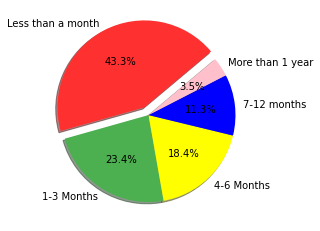

In [15]:
#creating pie chart for weather for when they accepted the coupon
weatherYes = df.loc[df['Accepted_Acommodation']== 0, :]['Time_Spent_Homeless'].value_counts()
weather = df['Time_Spent_Homeless'].value_counts() 
weatherNames = ['Less than a month', '1-3 Months', '4-6 Months' , '7-12 months', 'More than 1 year']
myexplode = [0.1, 0, 0, 0, 0]
mycolors = ["#FF3030", "#4CAF50", "yellow", "blue", "pink"]
plt.pie(weatherYes,labels=weatherNames,explode=myexplode,colors=mycolors,startangle = 40,shadow = True,autopct='%1.1f%%')

In [16]:
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Row_Number              364 non-null    int64 
 1   Gender                  364 non-null    object
 2   Location                364 non-null    object
 3   Time                    364 non-null    object
 4   Race                    364 non-null    object
 5   Time_Spent_Homeless     364 non-null    object
 6   Method_Found            364 non-null    object
 7   Eligible                364 non-null    int64 
 8   Preffered_Acommodation  364 non-null    int64 
 9   Accepted_Acommodation   364 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 28.6+ KB


In [17]:
print("Shape:")
df.shape

Shape:


(364, 10)

In [18]:
df.describe()

,Row_Number,Eligible,Preffered_Acommodation,Accepted_Acommodation
count,364.000000,364.000000,364.000000,364.000000
mean,182.500000,0.824176,0.497253,0.612637
std,105.221988,0.381194,0.500681,0.487818
min,1.000000,0.000000,0.000000,0.000000
25%,91.750000,1.000000,0.000000,0.000000
50%,182.500000,1.000000,0.000000,1.000000
75%,273.250000,1.000000,1.000000,1.000000
max,364.000000,1.000000,1.000000,1.000000


<Figure size 1080x720 with 0 Axes>

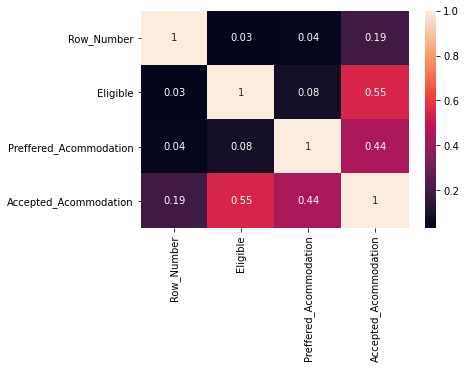

<Figure size 1080x720 with 0 Axes>

In [19]:
#producing a heatmap
matrix = df.corr().round(2)
sns.heatmap(data=matrix,annot=True)
plt.figure(figsize=(15,10))


# Data Preprocessing

# Handling Catergorical Values

In [20]:
#how many values in each category
print("Unique:")
df.nunique()

Unique:


Row_Number                364
Gender                      2
Location                   17
Time                        4
Race                        7
Time_Spent_Homeless         5
Method_Found                6
Eligible                    2
Preffered_Acommodation      2
Accepted_Acommodation       2
dtype: int64

In [21]:
#Performing the onehot encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',dtype=np.int)
dfn = df[['Gender','Location','Time_Spent_Homeless']]
dfn = encoder.fit_transform(dfn).toarray()
dfn = pd.DataFrame(dfn)
df = pd.concat([df,dfn], axis=1) #merges new table together
dfn


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
360,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
361,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Handling Non-Numerical Values

In [22]:
#Dropping non numerical values
df.drop(['Row_Number','Gender','Location','Time_Spent_Homeless', 'Time' ,'Race', 'Method_Found'],axis=1,inplace=True)
df

,Eligible,Preffered_Acommodation,Accepted_Acommodation,0,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
0,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
360,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
361,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
#Adjusting the axes
X = df.drop("Accepted_Acommodation",axis=1)
y = df["Accepted_Acommodation"]

# Feature scalling

In [24]:
#Applying Feauture Scaling 
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
sc = MinMaxScaler()
X = sc.fit_transform(X)
poly = PolynomialFeatures(degree=2,include_bias=False)
X = poly.fit_transform(X)

# PCA

In [25]:
#Applying PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
X = sc.fit_transform(X)
pca = PCA(n_components=2)
pComponents = pca.fit_transform(X)
pDf = pd.DataFrame(data=pComponents,columns=['pc1','pc2'])
df = pd.concat([pDf,df], axis=1) #merges new table together)
df

,pc1,pc2,Eligible,Preffered_Acommodation,Accepted_Acommodation,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,-1.734050,1.519326,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1.945505,3.021922,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-2.402840,0.587258,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2.995572,4.615660,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4.080688,-3.140543,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,-2.447574,1.936886,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
360,2.229515,-2.653227,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
361,-0.751244,1.037069,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
362,1.717033,0.078046,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
#Showing PCA variance ratio
pca.explained_variance_ratio_

array([0.04329301, 0.03932657])

# Applied Machine Learning Algorithms

# 1)KNeighborsClassifier

In [27]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)

In [28]:
#using the k-nearest neighbours classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
#testing score
accuracy = model.score(X_test,y_test)
print("Testing Score = {:.3f}".format(accuracy))

Testing Score = 0.682


In [30]:
#training score
accuracy = model.score(X_train,y_train)
print("Training Score = {:.3f}".format(accuracy))

Training Score = 0.925


# 1)Tuning

# 1)Grid Search

In [31]:
#selecting the range 
k_list = list(range(1,31)) # [3,6,9,15,20,25]
weight_list = ['uniform', 'distance']
para_dict = dict(n_neighbors=k_list, weights=weight_list)
print(para_dict)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [32]:
#using grid search as the classifier
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,para_dict,cv=5,scoring="accuracy",return_train_score=False)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [33]:
#outputs of gridsearch
pd.DataFrame(grid.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.642732,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.642732,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.565753,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.626218,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.629072,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.626332,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.579566,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.637253,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.672983,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.653843,"{'n_neighbors': 5, 'weights': 'distance'}"


In [34]:
#best model score
print("The best model's accuracy: {:.3f}".format(grid.best_score_))
print("Used values:", grid.best_params_)

The best model's accuracy: 0.720
Used values: {'n_neighbors': 21, 'weights': 'uniform'}


# 1)Random Search

In [35]:
#selecting the range 
k_list = list(range(1,31)) # [3,6,9,15,20,25]
weight_list = ['uniform', 'distance']
para_dict = dict(n_neighbors=k_list, weights=weight_list)
print(para_dict)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [36]:
#using random search 
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(model,para_dict,cv=5,scoring="accuracy",return_train_score=False, n_iter=10,random_state=5)
rand.fit(X,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [37]:
#showing the output of the data
pd.DataFrame(rand.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.686872,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.659399,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.645700,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.673174,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.686948,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.664878,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.684094,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.654033,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.681393,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.687024,"{'weights': 'uniform', 'n_neighbors': 15}"


In [38]:
#the best model accuracy  
print("The best model's accuracy: {:.3f}".format(rand.best_score_))
print("Used values:", rand.best_params_)
#4th iteration we get high score so random better is better than manually going through each value 

The best model's accuracy: 0.687
Used values: {'weights': 'uniform', 'n_neighbors': 15}


# 1)Evaluation

# 1)Applying CV

In [39]:
#model score
accuracy = model.score(X,y)
print("Model accuracy = {:.3f}".format(accuracy))

Model accuracy = 0.846


In [40]:
#applying cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5,scoring='accuracy')
print(scores)

[0.60273973 0.64383562 0.69863014 0.67123288 0.59722222]


In [41]:
ave = scores.mean()
print("Average CV model accuracy: {:.3f}".format(ave))

Average CV model accuracy: 0.643


In [42]:
k_list = range(1,30)
ave_scores = []
for k in k_list:
        model = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(model,X,y,cv=5,scoring='accuracy')
        ave_scores.append(round(scores.mean(), 3))

print(ave_scores)

[0.643, 0.566, 0.629, 0.58, 0.673, 0.591, 0.662, 0.602, 0.632, 0.618, 0.668, 0.643, 0.679, 0.654, 0.687, 0.646, 0.687, 0.646, 0.69, 0.646, 0.72, 0.659, 0.703, 0.665, 0.703, 0.649, 0.673, 0.643, 0.687]


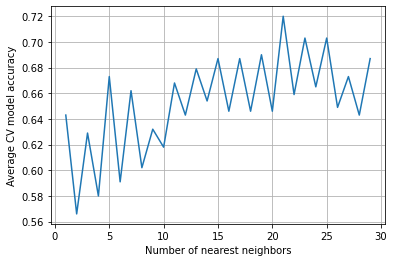

In [43]:
#illustrating cv scores
plt.plot(k_list,ave_scores)
plt.xlabel("Number of nearest neighbors")
plt.ylabel("Average CV model accuracy")
plt.grid()

In [44]:
#best model accuracy 
model = KNeighborsClassifier(n_neighbors=23)
scores = cross_val_score(model,X,y,cv=5,scoring='accuracy')
print("Best model accuracy: {:.3f}".format(round(scores.mean(), 3)))

Best model accuracy: 0.703


# 1)Confusion Matrix

In [45]:
#using confusion matrix
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
print(cfm)

[[41  4]
 [34 31]]


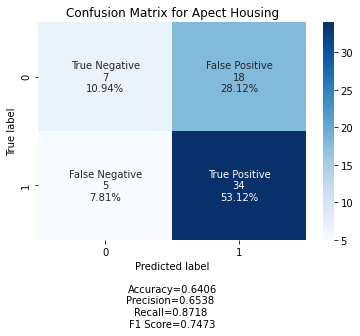

In [47]:
import numpy as np
import matplotlib.pyplot as plt 

cfm = np.reshape([7,18,5,34], (2, 2))

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm.flatten())]

labels = [f'{l1}\n{l2}\n{l3}' for l1, l2, l3 in zip(group_names,group_counts,group_percentages)]

labels = np.array(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues').set_title('Confusion Matrix for Apect Housing')

#Calculating accuracy, precision, recall, f1 score
accuracy  = np.trace(cfm) / float(np.sum(cfm))
precision = cfm[1,1] / (cfm[0,1] + cfm[1,1])
#Precision = TruePositives / (TruePositives + FalsePositives)

recall    = cfm[1,1] / (cfm[1,1] + cfm[1,0])
#Recall = TruePositives / (TruePositives + FalseNegatives)

f1_score  = 2 * (precision * recall) / (precision + recall)

info = "\n\nAccuracy={:0.4f}\nPrecision={:0.4f} \nRecall={:0.4f} \nF1 Score={:0.4f}".format(accuracy,precision,recall,f1_score)

plt.ylabel('True label')
plt.xlabel('Predicted label' + info)
plt.show()

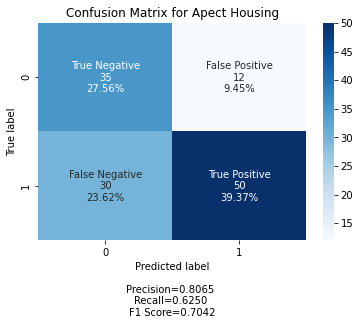

In [48]:
import numpy as np
import matplotlib.pyplot as plt 

cfm = np.reshape([35,12,30,50], (2, 2))

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]

group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm.flatten())]

labels = [f'{l1}\n{l2}\n{l3}' for l1, l2, l3 in zip(group_names,group_counts,group_percentages)]

labels = np.array(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues').set_title('Confusion Matrix for Apect Housing')

#Calculating accuracy, precision, recall, f1 score

precision = cfm[1,1] / (cfm[0,1] + cfm[1,1])
#Precision = TruePositives / (TruePositives + FalsePositives)

recall    = cfm[1,1] / (cfm[1,1] + cfm[1,0])
#Recall = TruePositives / (TruePositives + FalseNegatives)

f1_score  = 2 * (precision * recall) / (precision + recall)

info = "\n\nPrecision={:0.4f} \nRecall={:0.4f} \nF1 Score={:0.4f}".format(precision,recall,f1_score)

plt.ylabel('True label')
plt.xlabel('Predicted label' + info)
plt.show()

# 1)Evaluation Metrics

In [49]:
#using the classification report
from sklearn.metrics import classification_report
target_names = ["Rejected", "Acceped"]
cReport = classification_report(y_test,y_test_pred,target_names=target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.55      0.91      0.68        45
     Acceped       0.89      0.48      0.62        65

    accuracy                           0.65       110
   macro avg       0.72      0.69      0.65       110
weighted avg       0.75      0.65      0.65       110



In [50]:
model.fit(X_train, y_train)
pred_prob1 = model.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)




0.7957264957264958


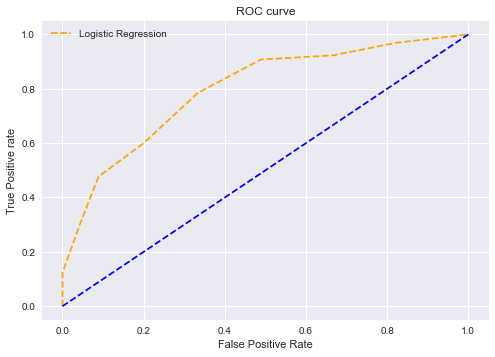

In [51]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();